In [24]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


Structure & Define the data

In [ ]:
path = '/content/'
files = os.listdir(path)

files[:10]


['.config',
 'berlin_weekdays.csv',
 'paris_weekdays.csv',
 'london_weekdays.csv',
 'athens_weekdays.csv',
 'london_weekends.csv',
 'vienna_weekdays.csv',
 'amsterdam_weekdays.csv',
 'barcelona_weekends.csv',
 'lisbon_weekends.csv']

Merge CVs

In [ ]:
all_dfs = []

for file in files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file))


        parts = file.replace(".csv", "").split("_")

        city = parts[0]
        day_type = parts[1]
        df["city"] = city
        df["day_type"] = day_type

        all_dfs.append(df)

# merge all files
data = pd.concat(all_dfs, ignore_index=True)

data.head()


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
0,0,185.799757,Private room,False,True,2.0,True,0,0,10.0,...,3.582211,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.49150,berlin,weekdays
1,1,194.914462,Private room,False,True,5.0,False,0,1,9.0,...,3.525410,0.511922,75.339529,11.487002,106.442356,21.947685,13.46800,52.51900,berlin,weekdays
2,2,176.217631,Private room,False,True,2.0,False,0,0,9.0,...,3.801713,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527,berlin,weekdays
3,3,207.768533,Private room,False,True,3.0,True,0,0,10.0,...,0.982408,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139,berlin,weekdays
4,4,150.743199,Private room,False,True,2.0,False,0,0,10.0,...,8.869697,2.187188,39.860151,6.077469,50.996308,10.515090,13.52440,52.47842,berlin,weekdays


In [ ]:
data.info()
data.describe(include='all')
data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

,0
Unnamed: 0,0
realSum,0
room_type,0
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0
cleanliness_rating,0


**Price comparison (realSum) across cities**

In [ ]:
data.groupby(["city", "day_type"])["realSum"].mean().unstack()


day_type,weekdays,weekends
city,,
amsterdam,545.020526,604.828018
athens,155.866982,147.580456
barcelona,288.391667,300.277940
berlin,240.220422,249.252516
budapest,168.429367,185.120628
lisbon,236.345459,240.044051
london,360.230348,364.389747
paris,398.786678,387.028589
rome,201.618053,209.130063


Price stats (describe)

In [10]:
data["realSum"].describe()


,realSum
count,51707.000000
mean,279.879591
std,327.948386
min,34.779339
25%,148.752174
50%,211.343089
75%,319.694287
max,18545.450285


Satisfaction stats

In [15]:
data["guest_satisfaction_overall"].describe()


,guest_satisfaction_overall
count,51707.000000
mean,92.628232
std,8.945531
min,20.000000
25%,90.000000
50%,95.000000
75%,99.000000
max,100.000000


Distances

In [16]:
data["dist"].describe()
data["metro_dist"].describe()


,metro_dist
count,51707.000000
mean,0.681540
std,0.858023
min,0.002301
25%,0.248480
50%,0.413269
75%,0.737840
max,14.273577


City-Level Analysis

Average Price per City



In [17]:
data.groupby("city")["realSum"].mean().sort_values()


,realSum
city,
athens,151.744121
budapest,176.513548
rome,205.391950
lisbon,238.210479
vienna,241.582484
berlin,244.583752
barcelona,293.753706
london,362.469256
paris,392.531403


Average Price — Weekday vs Weekend

In [18]:
data.groupby(["city","day_type"])["realSum"].mean().unstack()


day_type,weekdays,weekends
city,,
amsterdam,545.020526,604.828018
athens,155.866982,147.580456
barcelona,288.391667,300.277940
berlin,240.220422,249.252516
budapest,168.429367,185.120628
lisbon,236.345459,240.044051
london,360.230348,364.389747
paris,398.786678,387.028589
rome,201.618053,209.130063


 Boxplot of Prices per City

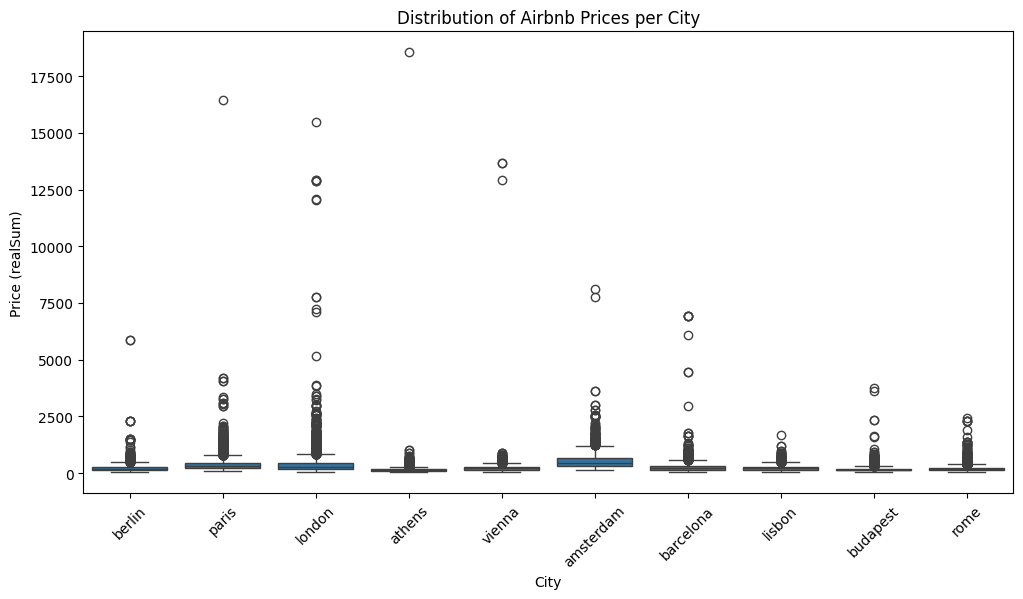

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="city", y="realSum")

plt.title("Distribution of Airbnb Prices per City")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Price (realSum)")
plt.show()


log-scale boxplot to handle extreme prices

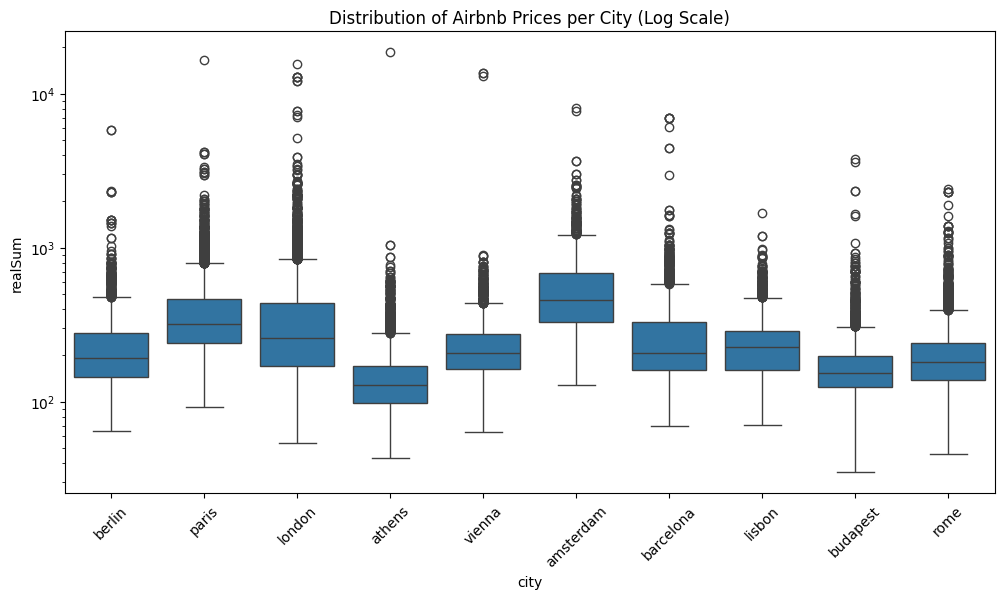

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="city", y="realSum")
plt.yscale("log")
plt.title("Distribution of Airbnb Prices per City (Log Scale)")
plt.xticks(rotation=45)
plt.show()


Room-Level Analysis

Price by Room Type

In [19]:
data.groupby("room_type")["realSum"].mean()


,realSum
room_type,
Entire home/apt,324.315150
Private room,204.940233
Shared room,143.566164


 Does number of bedrooms increase price?

<Axes: xlabel='bedrooms', ylabel='realSum'>

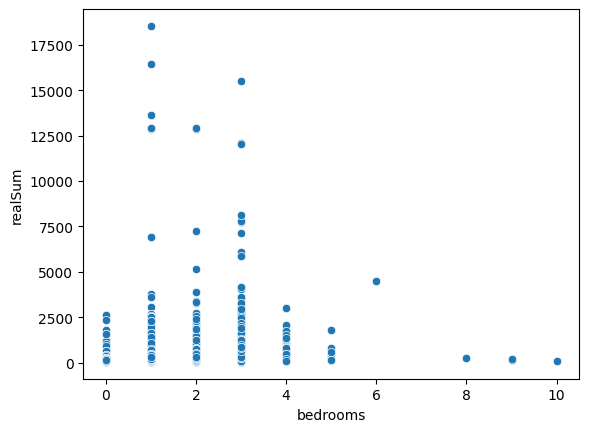

In [22]:
sns.scatterplot(x="bedrooms", y="realSum", data=data)


Distance Effects

 Price vs Distance from City Center

<Axes: xlabel='dist', ylabel='realSum'>

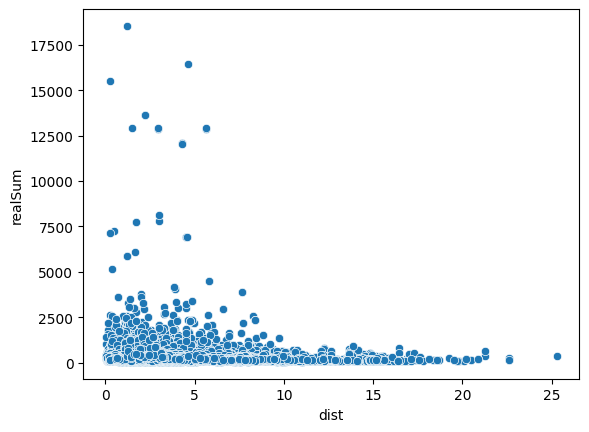

In [27]:
sns.scatterplot(x="dist", y="realSum", data=data)


Price vs  Nearest Metro Distance

<Axes: xlabel='metro_dist', ylabel='realSum'>

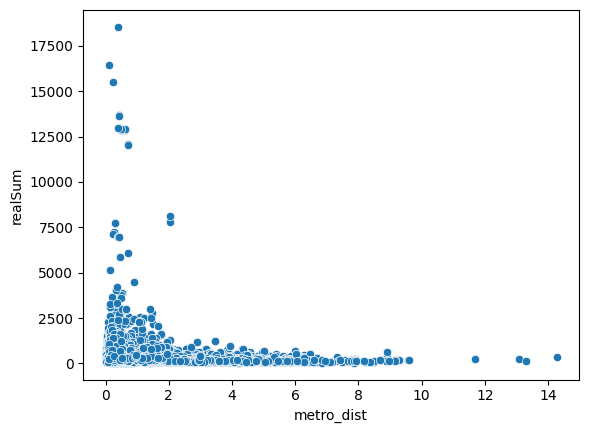

In [28]:
sns.scatterplot(x="metro_dist", y="realSum", data=data)


Satisfaction & Cleanliness Analysis

Cleanliness vs Price

<Axes: xlabel='realSum', ylabel='cleanliness_rating'>

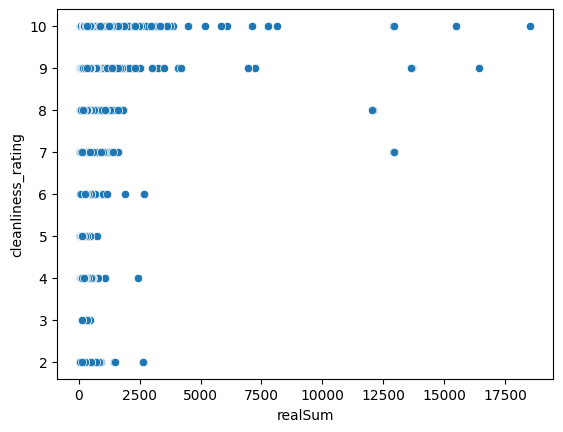

In [29]:
sns.scatterplot(x="realSum", y="cleanliness_rating", data=data)


Satisfaction vs Distance

<Axes: xlabel='dist', ylabel='guest_satisfaction_overall'>

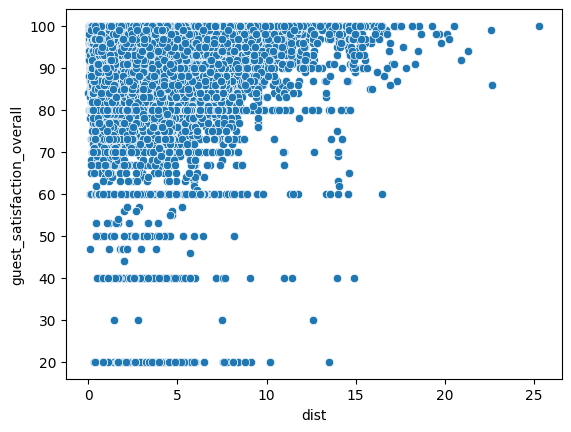

In [30]:
sns.scatterplot(x="dist", y="guest_satisfaction_overall", data=data)


Satisfaction Distribution per City

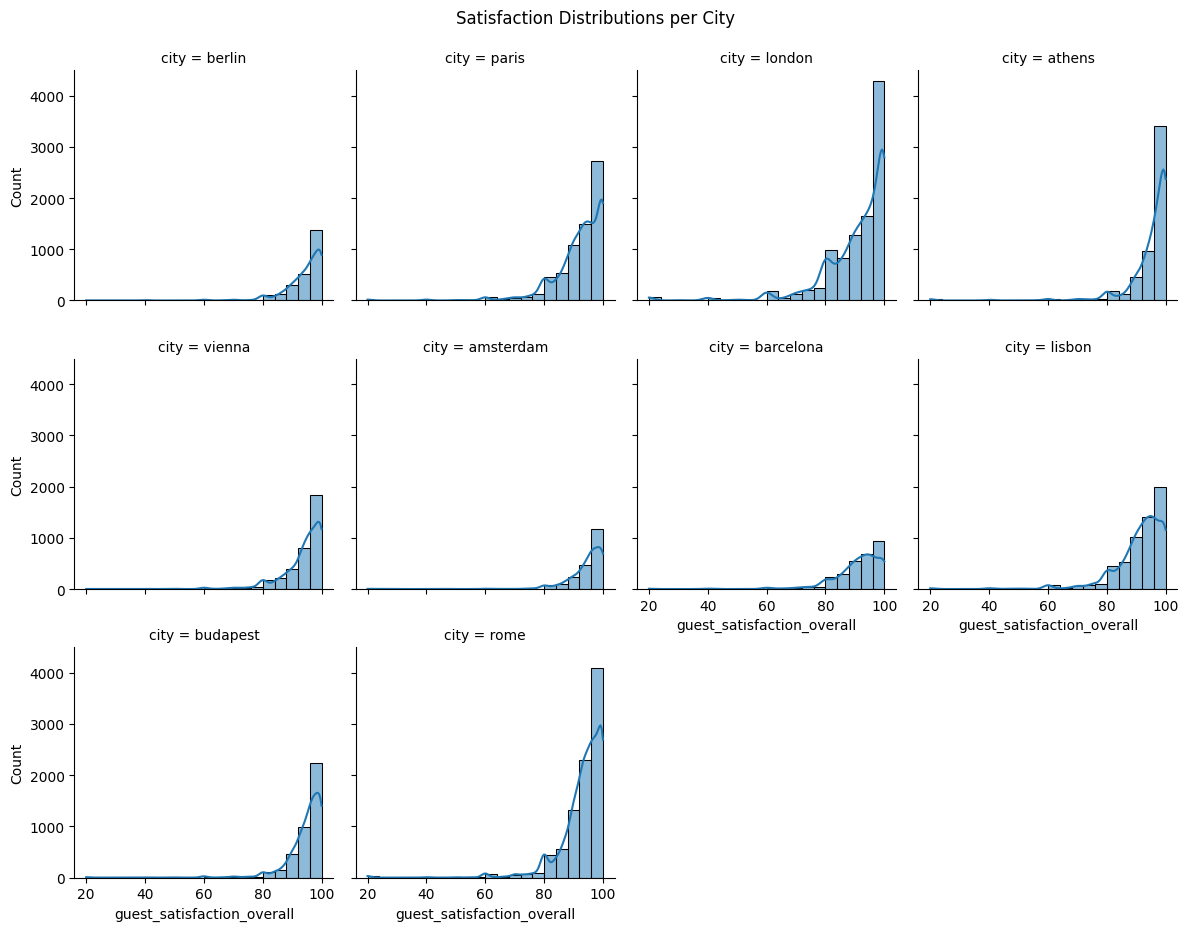

In [33]:
g = sns.FacetGrid(data, col="city", col_wrap=4, height=3, sharex=True, sharey=True)
g.map(sns.histplot, "guest_satisfaction_overall", kde=True, bins=20)

g.fig.suptitle("Satisfaction Distributions per City", y=1.03)
plt.show()




# Correlation Analysis

<Axes: >

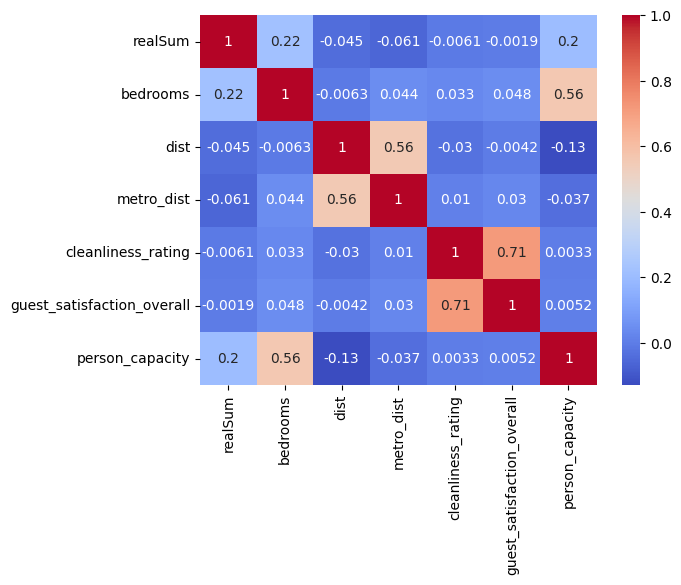

In [34]:
numeric_cols = ["realSum","bedrooms","dist","metro_dist",
                "cleanliness_rating","guest_satisfaction_overall",
                "person_capacity"]

sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm")


Mapping

Price Map

<Axes: xlabel='lng', ylabel='lat'>

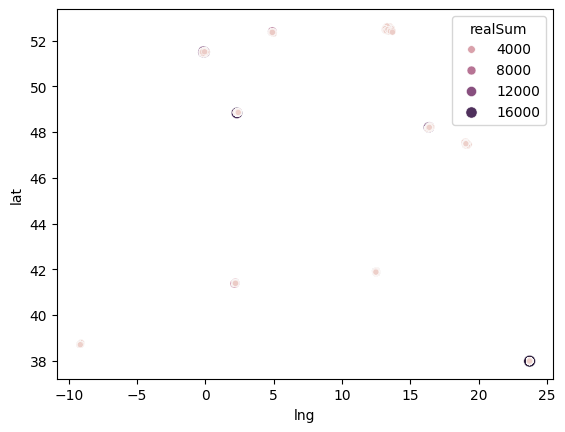

In [35]:
sns.scatterplot(data=data, x="lng", y="lat", hue="realSum", size="realSum")


In [ ]:
Observation analysis (Q/A)

In [ ]:
1) Which city is most expensive?

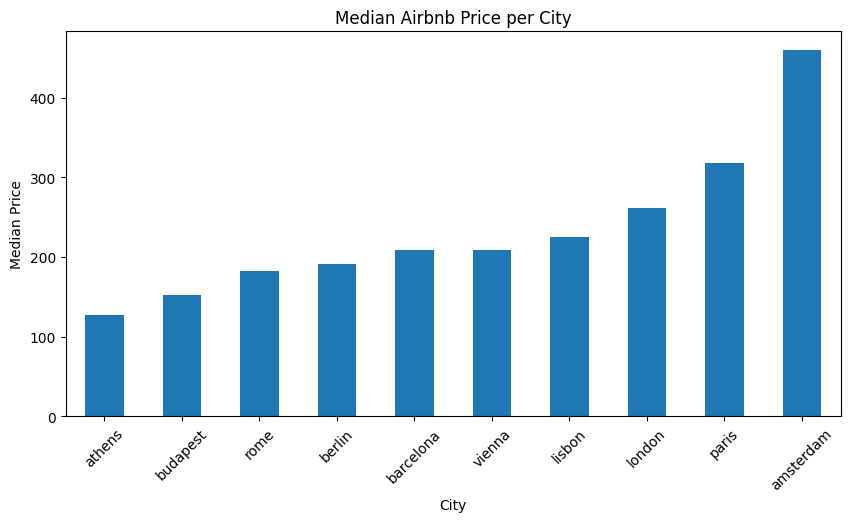

('amsterdam', 460.24418250415954)

In [38]:
import matplotlib.pyplot as plt

city_prices = data.groupby("city")["realSum"].median().sort_values()

plt.figure(figsize=(10,5))
city_prices.plot(kind="bar")
plt.title("Median Airbnb Price per City")
plt.ylabel("Median Price")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

# Most expensive city + price
city_prices.idxmax(), city_prices.max()


Which city gives best “value for money”?

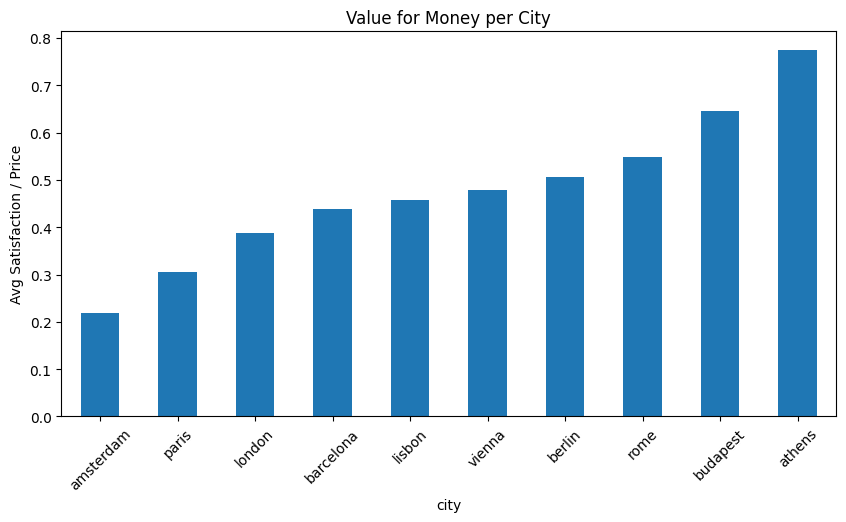

('athens', 0.775078940263049)

In [39]:
data["value_for_money"] = data["guest_satisfaction_overall"] / data["realSum"]

value_cities = data.groupby("city")["value_for_money"].mean().sort_values()

plt.figure(figsize=(10,5))
value_cities.plot(kind="bar")
plt.title("Value for Money per City")
plt.ylabel("Avg Satisfaction / Price")
plt.xticks(rotation=45)
plt.show()

value_cities.idxmax(), value_cities.max()


3) Is weekend price higher or lower compared to weekdays?

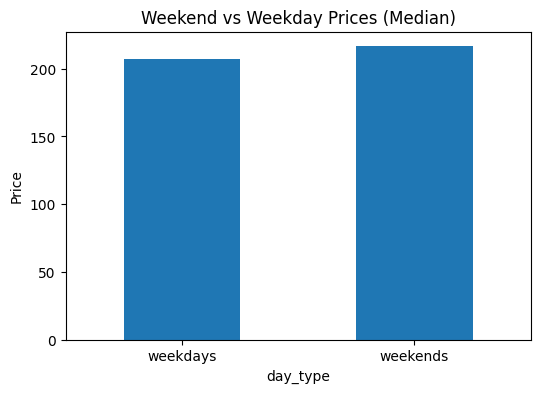

,realSum
day_type,
weekdays,207.148849
weekends,216.463415


In [40]:
week_compare = data.groupby("day_type")["realSum"].median()

plt.figure(figsize=(6,4))
week_compare.plot(kind="bar")
plt.title("Weekend vs Weekday Prices (Median)")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.show()

week_compare


4) Does distance affect price strongly?

In [41]:
corr_dist = data["realSum"].corr(data["dist"])
corr_dist


np.float64(-0.04472540853969393)

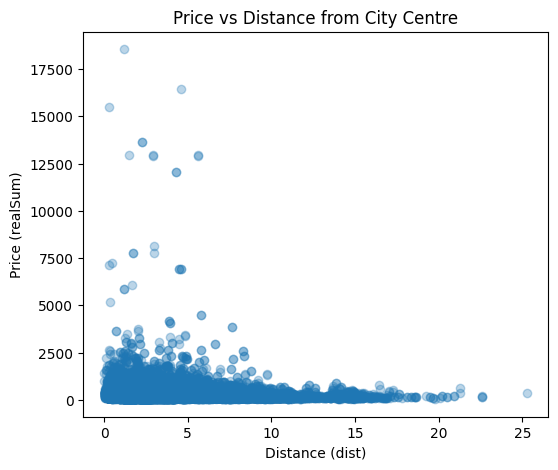

In [42]:
plt.figure(figsize=(6,5))
plt.scatter(data["dist"], data["realSum"], alpha=0.3)
plt.title("Price vs Distance from City Centre")
plt.xlabel("Distance (dist)")
plt.ylabel("Price (realSum)")
plt.show()


 5) Do superhosts charge higher prices?

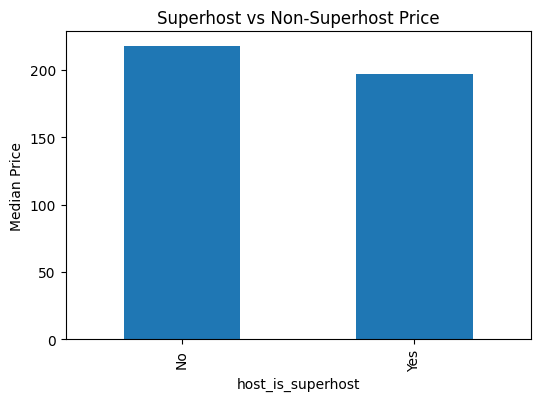

,realSum
host_is_superhost,
False,217.549801
True,197.040881


In [43]:
superhost_prices = data.groupby("host_is_superhost")["realSum"].median()

plt.figure(figsize=(6,4))
superhost_prices.plot(kind="bar")
plt.title("Superhost vs Non-Superhost Price")
plt.ylabel("Median Price")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

superhost_prices


7) Is satisfaction linked to price or distance?

(a) Satisfaction vs Price

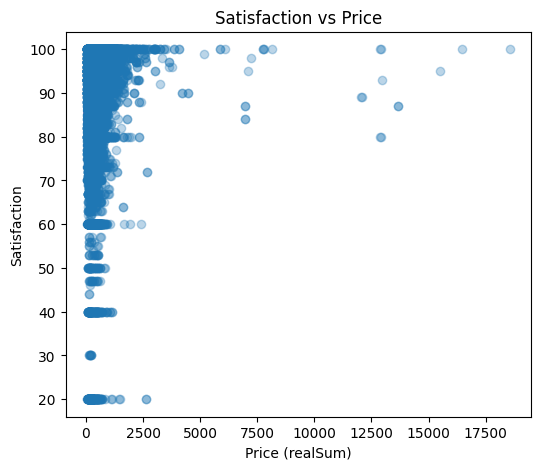

np.float64(-0.0018875377310189994)

In [47]:
plt.figure(figsize=(6,5))
plt.scatter(data["realSum"], data["guest_satisfaction_overall"], alpha=0.3)
plt.title("Satisfaction vs Price")
plt.xlabel("Price (realSum)")
plt.ylabel("Satisfaction")
plt.show()

corr_sat_price = data["guest_satisfaction_overall"].corr(data["realSum"])
corr_sat_price


(b) Satisfaction vs Distance

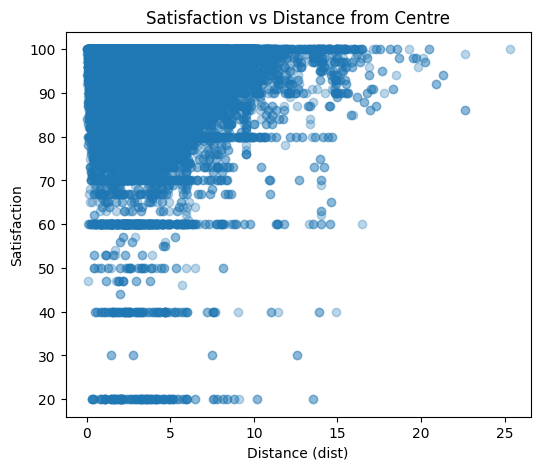

np.float64(-0.004178420362120761)

In [48]:
plt.figure(figsize=(6,5))
plt.scatter(data["dist"], data["guest_satisfaction_overall"], alpha=0.3)
plt.title("Satisfaction vs Distance from Centre")
plt.xlabel("Distance (dist)")
plt.ylabel("Satisfaction")
plt.show()

corr_sat_dist = data["guest_satisfaction_overall"].corr(data["dist"])
corr_sat_dist
